In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd

In [2]:
paramA = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
Lin = LinData.LinData_Class(paramA)
paramB = RRead.read_parameters('pflrw_d3e2_L1000_t1_N64_LCDM')

fA = pd.read_table(paramA['datapath']+'h5_data.csv', delimiter=',')
fcA = pd.read_table(paramA['datapath']+'constraints.csv', delimiter=',')
fB = pd.read_table(paramB['datapath']+'h5_data.csv', delimiter=',')
fcB = pd.read_table(paramB['datapath']+'constraints.csv', delimiter=',')

 read time file


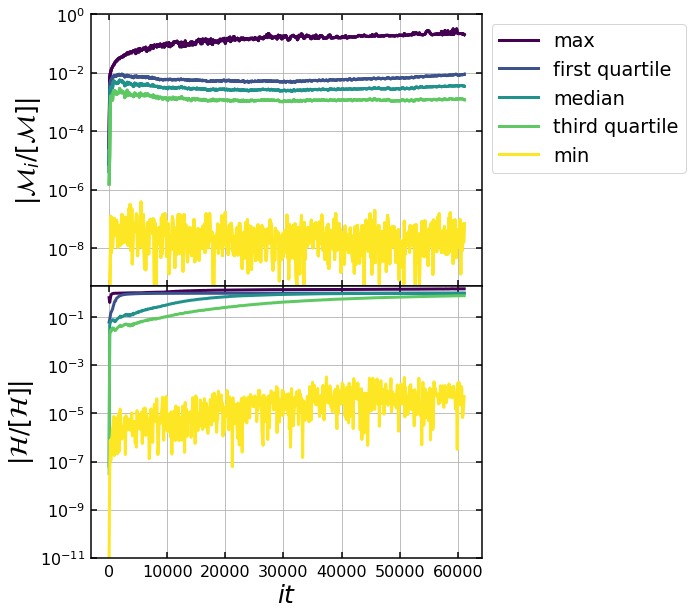

In [3]:
fc = fcB
an = fc['it']

plt.figure(figsize=(7, 10))
labsize = 25
alphafac = 0.1
locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
loclabs = ['max', 'first quartile', 'median', 'third quartile', 'min']
cols = plt.cm.viridis(np.linspace(0,1,len(locs)))

ax = plt.subplot(211)
for i, loc, in enumerate(locs):
    for n in range(3):
        varstr = 'Mom'+str(n+1)+'/MomEScale_'+loc
        var = np.array(fc[varstr])
        if n==0:
            ax.semilogy(an, var, color=cols[i], linestyle='-', label=loclabs[i])
        else:
            ax.semilogy(an, var, color=cols[i], linestyle='-')
ax.grid()
ax.legend(bbox_to_anchor=(1,1))
ax.set_xticklabels([])
ax.set_ylim(5e-10, 1)
ax.set_ylabel(r'$|\mathcal{M}_{i}/[\mathcal{M}]|$', fontsize=labsize)


ax = plt.subplot(212)
for i, loc, in enumerate(locs):
        varstr = 'Ham/HamEScale_'+loc
        var = np.array(fc[varstr])
        ax.semilogy(an, var, color=cols[i], linestyle='-')
ax.grid()
ax.set_ylim(1e-11, 2)
ax.set_xlabel(r'$it$', fontsize=labsize)
ax.set_ylabel(r'$|\mathcal{H}/[\mathcal{H}]|$', fontsize=labsize)

plt.subplots_adjust(hspace=0)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprec

Text(0.5, 0, '$a/a(t=1)$')

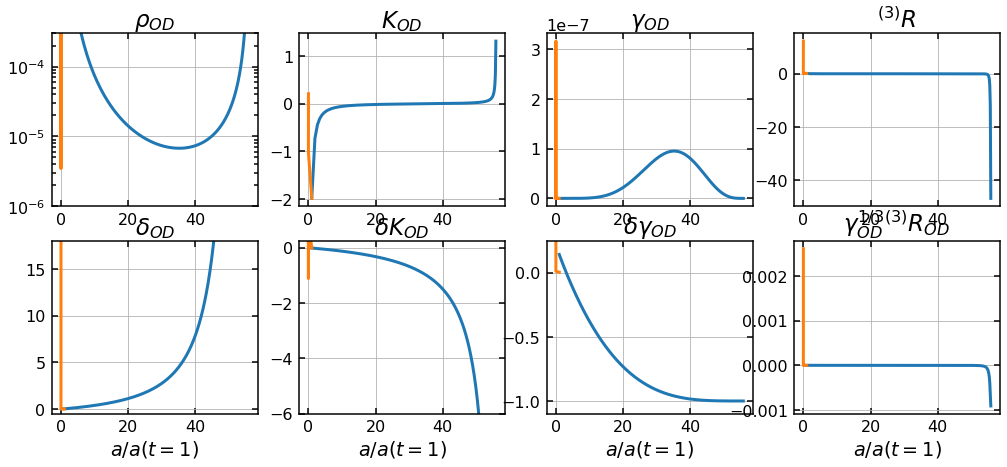

In [4]:
plt.figure(figsize=(17, 7))

for f in [fA, fB]:
    try:
        an = f['an']
    except:
        an = Lin.an_initial(f['t'])


    plt.subplot(241)
    try:
        plt.semilogy(an, f['rho_OD'])
    except:
        plt.semilogy(an, f['rho_u_OD'])
        
    plt.subplot(242)
    plt.plot(an, f['K_OD'])
    
    plt.subplot(243)
    plt.plot(an, f['gdet_OD'])
    
    plt.subplot(244)
    plt.plot(an, f['RicciS_OD'])
    
    plt.subplot(245)
    try:
        delta = f['drho_OD']
    except:
        delta = f['drho_u_OD']
    plt.plot(an, delta)
    
    plt.subplot(246)
    plt.plot(an, f['dK_OD'])
    
    plt.subplot(247)
    plt.plot(an, f['dgdet_OD'])
    
    plt.subplot(248)
    plt.plot(an, (f['gdet_OD']**(1/3)) * f['RicciS_OD'])
        
plt.subplot(241)
plt.grid()
plt.title(r'$\rho_{OD}$')
plt.ylim(1e-6, 3e-4)

plt.subplot(242)
plt.grid()
plt.title(r'$K_{OD}$')

plt.subplot(243)
plt.grid()
plt.title(r'$\gamma_{OD}$')

plt.subplot(244)
plt.grid()
plt.title(r'${}^{(3)}R$')

plt.subplot(245)
plt.grid()
plt.title(r'$\delta_{OD}$')
plt.ylim(-0.5, 18)
plt.xlabel(r'$a/a(t=1)$')

plt.subplot(246)
plt.grid()
plt.title(r'$\delta K_{OD}$')
plt.xlabel(r'$a/a(t=1)$')
plt.ylim(-6, 0.25)

plt.subplot(247)
plt.grid()
plt.title(r'$\delta \gamma_{OD}$')
plt.xlabel(r'$a/a(t=1)$')
plt.ylim(-1.1, 0.25)

plt.subplot(248)
plt.grid()
plt.title(r'$\gamma^{1/3}_{OD} {}^{(3)}R_{OD}$')
plt.xlabel(r'$a/a(t=1)$')

In [34]:
print('i do some math')
try:
    RRead.fixij(f[self.get_key('ADMBase', 'lapse', it)])
except:
    pass
print('i continue math')

i do some math
i continue math


[0, 100, 200, 300]